In [67]:
import pandas as pd
import numpy as np
airbnb = pd.read_csv("listings.csv")
airbnb

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,https://www.airbnb.com/rooms/653494030951422457,20220924142144,2022-09-25,previous scrape,Top-floor Villa Apartment in the Heart of Hell...,Family apartment located on the 1st floor of a...,The apartment is located one block from Strand...,https://a0.muscache.com/pictures/miso/Hosting-...,465189427,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
13811,647809303952891559,https://www.airbnb.com/rooms/647809303952891559,20220924142144,2022-09-25,previous scrape,Dejligt lille hus med flere hyggekroge ude og ...,Lille villa i roligt kvarter 15 min fra Københ...,"Nice green areas, football field, lake, playgr...",https://a0.muscache.com/pictures/b466ccb0-cef0...,4862421,...,5.00,4.67,5.00,NaN,f,1,1,0,0,1.01
13812,650819220455514228,https://www.airbnb.com/rooms/650819220455514228,20220924142144,2022-09-25,previous scrape,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,"Smuk og hyggelig lejlighed tæt på Hvidovre st,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,134647873,...,5.00,4.67,5.00,NaN,t,1,1,0,0,1.27
13813,658612163688161695,https://www.airbnb.com/rooms/658612163688161695,20220924142144,2022-09-25,previous scrape,Cosy apartment with a great view in Copenhagen,Well located apartment close to grocery stores...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,256903668,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


1. Need to keep fallowing columns:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365

In [68]:
#Dropping unwanted columns:
coll_toKeep = ["id", "name", "host_id", "host_name", "neighbourhood_cleansed", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "last_review", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

airbnb_rev = airbnb[airbnb.columns.intersection(coll_toKeep)]
airbnb_rev

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,2022-06-21,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1,1.08
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,2022-08-09,4.91,4.93,4.96,4.93,4.86,4.94,4.81,1,0.55
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,2022-09-10,4.53,4.63,4.44,4.78,4.70,4.89,4.59,3,2.06
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,2022-08-04,4.92,4.87,4.73,5.00,5.00,4.87,4.80,1,0.16
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,2022-08-22,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,Top-floor Villa Apartment in the Heart of Hell...,465189427,Martine,sterbro,55.732840,12.572370,Entire home/apt,"$1,250.00",14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,2022-07-21,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1,1.01
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,2022-08-14,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1,1.27
13813,658612163688161695,Cosy apartment with a great view in Copenhagen,256903668,Sam,Brnshj-Husum,55.730971,12.487993,Entire home/apt,$850.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

In [69]:
airbnb_rev = airbnb_rev[airbnb.number_of_reviews != 0]
airbnb_rev

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,2022-06-21,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1,1.08
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,2022-08-09,4.91,4.93,4.96,4.93,4.86,4.94,4.81,1,0.55
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,2022-09-10,4.53,4.63,4.44,4.78,4.70,4.89,4.59,3,2.06
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,2022-08-04,4.92,4.87,4.73,5.00,5.00,4.87,4.80,1,0.16
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,2022-08-22,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,2022-08-28,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1,1.85
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,2022-09-04,5.00,4.50,5.00,5.00,5.00,4.75,5.00,2,1.64
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,2022-07-21,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1,1.01
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,2022-08-14,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1,1.27


3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.


In [70]:
titanic = pd.read_csv("listings.csv")
# extract only id and host_neighbourhood
titanic = titanic[titanic.columns.intersection(["id","host_neighbourhood"])]

merged_table = pd.merge(airbnb_rev,titanic, on='id')
merged_table


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_neighbourhood
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1,1.08,Nørrebro
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,1,0.55,Indre By
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,3,2.06,Indre By
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,1,0.16,Vesterbro
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1,0.13,Vesterbro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12165,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1,1.85,NaN
12166,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,2,1.64,NaN
12167,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1,1.01,NaN
12168,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1,1.27,NaN


In [71]:
# loop into the table and check if is missing any special character æ ø å, for example the table 
# host_neighbourhood has the right names and we need to check agains the neighbourhood_cleansed,
# if are not matching than we need to change the value of neighbourhood_cleansed with the one from 
# host_neighbourhood
for index, row in merged_table.iterrows():
    if row['neighbourhood_cleansed'] != row['host_neighbourhood']:
        merged_table.at[index, 'neighbourhood_cleansed'] = row['host_neighbourhood']


# Remove the '$' symbol and append ' DKK'
merged_table['price'] = merged_table['price'].str.replace('$', '') + ' DKK'

#we drop the colum host_neighbourhood and put it back to table_rev
airbnb_rev = merged_table.drop(["host_neighbourhood"], axis='columns')
airbnb_rev

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.00 DKK,3,...,2022-06-21,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1,1.08
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"2,600.00 DKK",4,...,2022-08-09,4.91,4.93,4.96,4.93,4.86,4.94,4.81,1,0.55
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"3,250.00 DKK",3,...,2022-09-10,4.53,4.63,4.44,4.78,4.70,4.89,4.59,3,2.06
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro,55.670230,12.555040,Entire home/apt,725.00 DKK,7,...,2022-08-04,4.92,4.87,4.73,5.00,5.00,4.87,4.80,1,0.16
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro,55.666602,12.555283,Entire home/apt,"1,954.00 DKK",3,...,2022-08-22,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12165,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,NaN,55.739028,12.487433,Entire home/apt,856.00 DKK,6,...,2022-08-28,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1,1.85
12166,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,NaN,55.730481,12.521243,Entire home/apt,"1,050.00 DKK",2,...,2022-09-04,5.00,4.50,5.00,5.00,5.00,4.75,5.00,2,1.64
12167,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,NaN,55.667782,12.463285,Entire home/apt,450.00 DKK,3,...,2022-07-21,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1,1.01
12168,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,NaN,55.659536,12.474726,Entire home/apt,400.00 DKK,1,...,2022-08-14,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1,1.27


4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

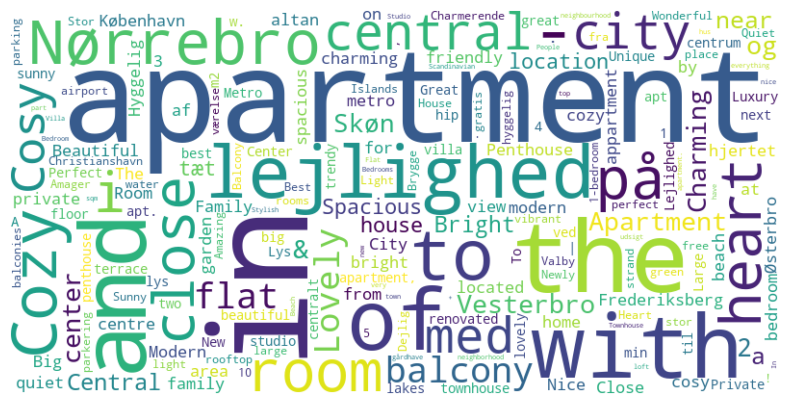

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# function to perform case-insensitive replacement of variations for Copenhagen word
def replace_copenhagen(text):
    return re.sub(r'(?i)\b(CPH|cph|Copenhaga|Copenhagen|copenhagen)\b', '', text)

# apply the new text
airbnb_rev['name'] = airbnb_rev['name'].apply(replace_copenhagen)  # Remove 'Copenhagen'

# Calculate Word Frequency
word_freq = airbnb_rev['name'].str.split().explode().value_counts()

# Create Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

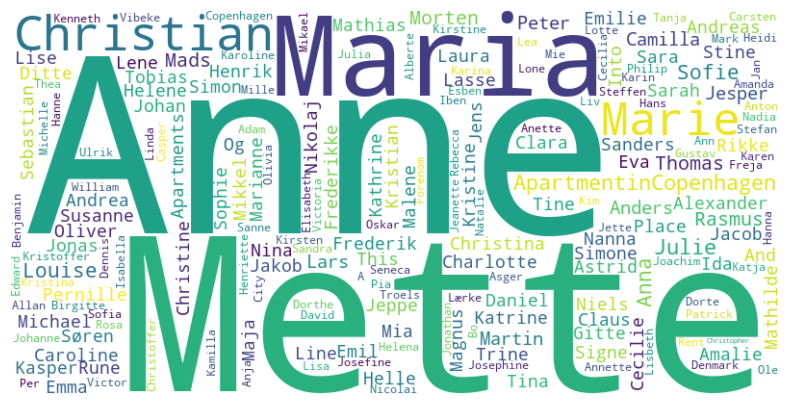

In [78]:
airbnb_rev['host_name'] = airbnb_rev['host_name'].str.replace('&', '')
# Calculate Word Frequency
word_freq = airbnb_rev['host_name'].str.split().explode().value_counts()

# Create Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.


In [83]:
# set edges
bin_edges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000, float('inf')]
bin_labels = ['0-100 DKK', '100-200 DKK', '200-300 DKK', '300-400 DKK', '400-500 DKK', '500-600 DKK', '600-700 DKK', '700-800 DKK', '800-900 DKK', '900-1000 DKK', '1000-10000 DKK', 'Over 10000 DKK']

# create new colum called bins and put the bins base on the price, ofc we need to remove DKK and , from the string
# and covert to float
airbnb_rev['bins'] = pd.cut(airbnb_rev['price'].str.replace(' DKK', '').str.replace(',','').astype(float), bins=bin_edges, labels=bin_labels)

airbnb_rev


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bins
0,6983,'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.00 DKK,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1,1.08,800-900 DKK
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"2,600.00 DKK",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,1,0.55,1000-10000 DKK
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"3,250.00 DKK",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,3,2.06,1000-10000 DKK
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro,55.670230,12.555040,Entire home/apt,725.00 DKK,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,1,0.16,700-800 DKK
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro,55.666602,12.555283,Entire home/apt,"1,954.00 DKK",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1,0.13,1000-10000 DKK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12165,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,NaN,55.739028,12.487433,Entire home/apt,856.00 DKK,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1,1.85,800-900 DKK
12166,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,NaN,55.730481,12.521243,Entire home/apt,"1,050.00 DKK",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,2,1.64,1000-10000 DKK
12167,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,NaN,55.667782,12.463285,Entire home/apt,450.00 DKK,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1,1.01,400-500 DKK
12168,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,NaN,55.659536,12.474726,Entire home/apt,400.00 DKK,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1,1.27,300-400 DKK


7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

In [89]:
import folium
import seaborn as sns

# Plotting listings on a map using Folium
m = folium.Map(location=[airbnb_rev['latitude'].mean(), airbnb_rev['longitude'].mean()], zoom_start=15)

for index, row in airbnb_rev.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=sns.color_palette("husl", len(airbnb_rev['bins'].unique()))[airbnb_rev['bins'].cat.codes[index]],
        fill=True,
        fill_color=sns.color_palette("husl", len(airbnb_rev['bins'].unique()))[airbnb_rev['bins'].cat.codes[index]],
        fill_opacity=0.6,
        popup=f"Price Bin: {row['bins']}",
    ).add_to(m)
    

m.save('listings_map.html')
# is creating in the folder and can open to see on browser

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


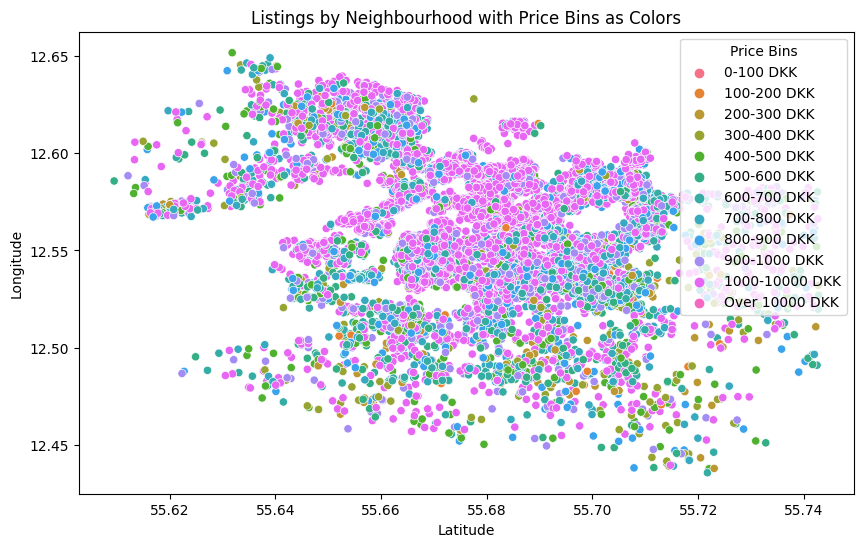

In [91]:
# Create a plot grouped by neighbourhood with price bins as colors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airbnb_rev, x='latitude', y='longitude', hue='bins', palette='husl')
plt.title('Listings by Neighbourhood with Price Bins as Colors')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Price Bins', loc='upper right')
plt.show()

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

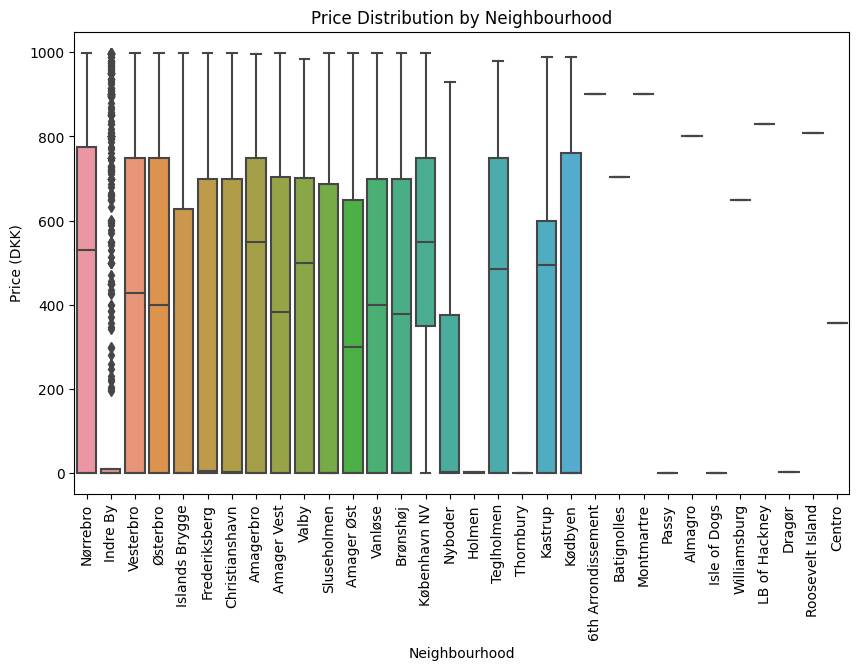

In [98]:
# Create a boxplot for prices by neighbourhood
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb_rev, x='neighbourhood_cleansed', y='price')
plt.title('Price Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (DKK)')
plt.xticks(rotation=90)
plt.show()

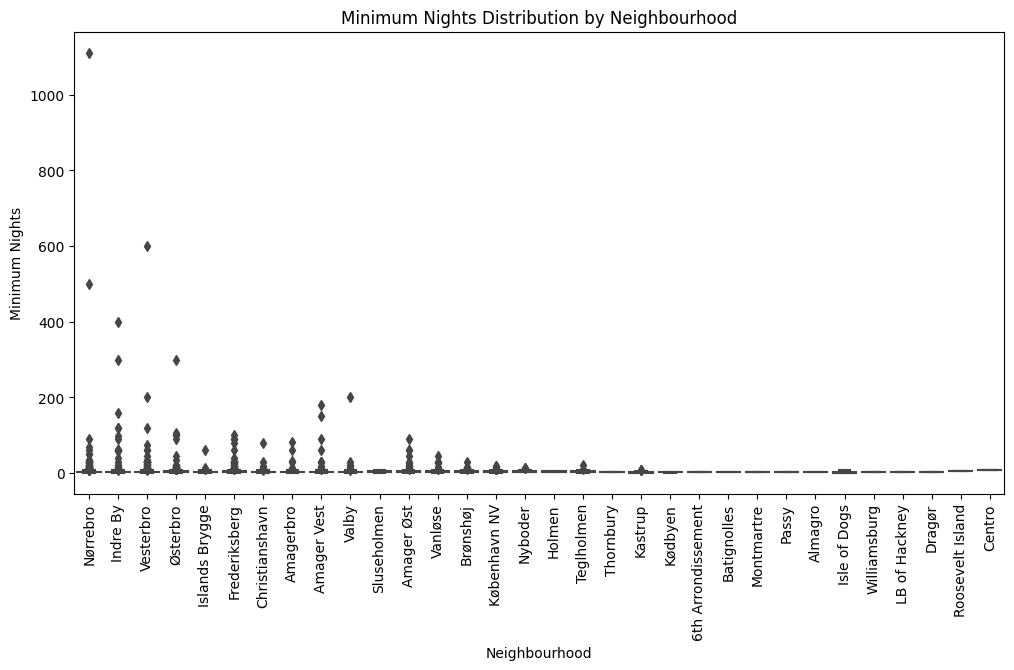

In [99]:
# Boxplot of Minimum Nights by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(data=airbnb_rev, x='neighbourhood_cleansed', y='minimum_nights')
plt.title('Minimum Nights Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Minimum Nights')
plt.xticks(rotation=90)
plt.show()

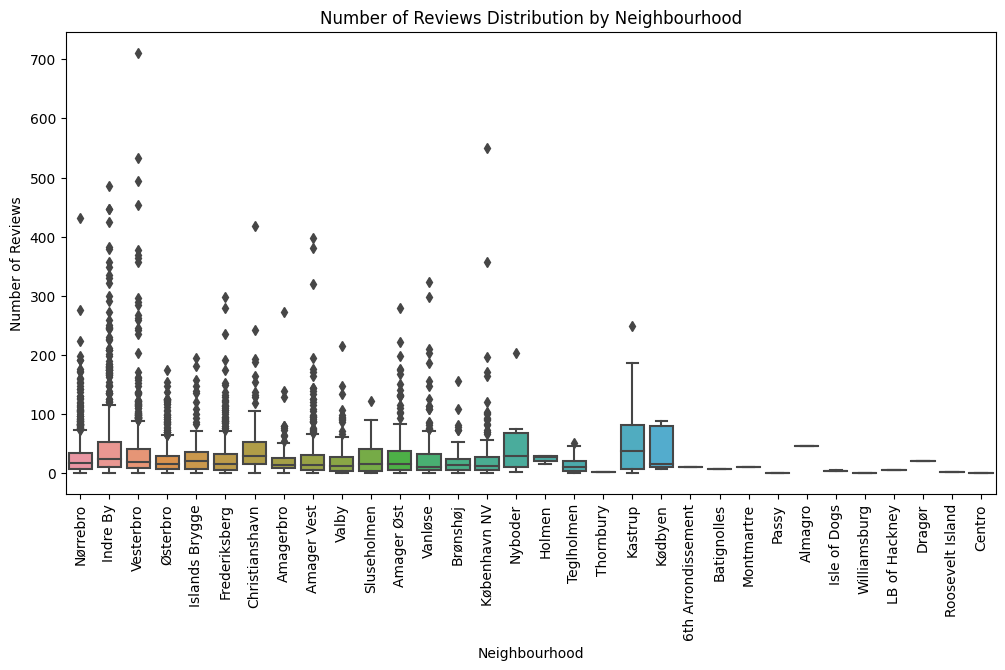

In [100]:
# Boxplot of Number of Reviews by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(data=airbnb_rev, x='neighbourhood_cleansed', y='number_of_reviews')
plt.title('Number of Reviews Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

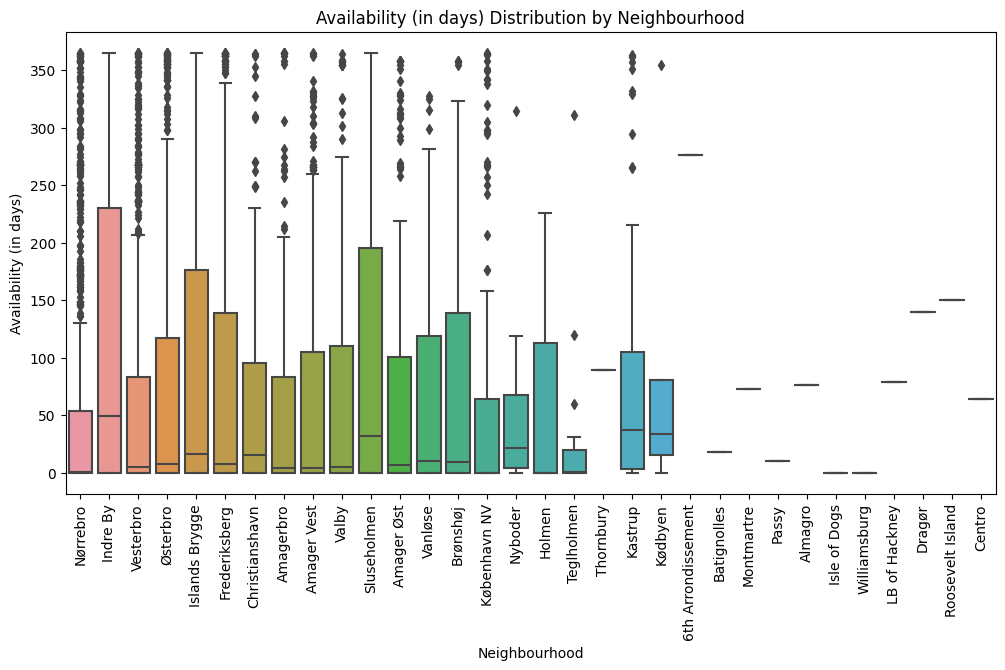

In [101]:
# Boxplot of Availability (in days) by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(data=airbnb_rev, x='neighbourhood_cleansed', y='availability_365')
plt.title('Availability (in days) Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Availability (in days)')
plt.xticks(rotation=90)
plt.show()

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

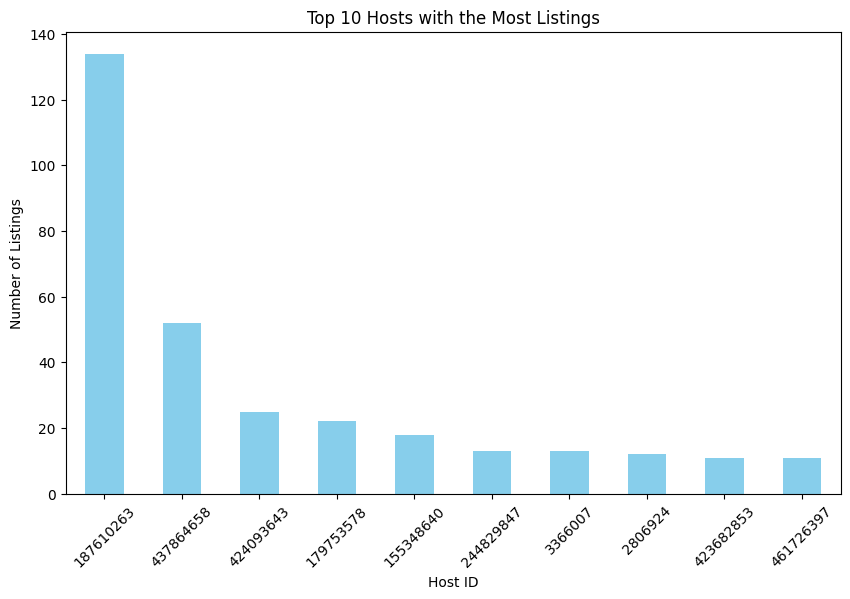

In [102]:
# Count the number of listings for each host and select the top 10 hosts
top_hosts = airbnb_rev['host_id'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_hosts.plot(kind='bar', color='skyblue')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.title('Top 10 Hosts with the Most Listings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [103]:
# Group the data by 'neighbourhood' and 'room_type' and calculate the desired statistics
neighborhood_stats = airbnb_rev.groupby(['neighbourhood_cleansed', 'room_type'])['price'].agg(
    mean='mean',
    mode=lambda x: x.mode().iat[0] if not x.empty else None,
    median='median',
    std='std',
    min='min',
    max='max',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
).reset_index()

# Display the descriptive statistics for each neighborhood and room type
print(neighborhood_stats)

   neighbourhood_cleansed        room_type        mean   mode  median  \
0      6th Arrondissement  Entire home/apt  900.000000  900.0   900.0   
1                 Almagro     Private room  800.000000  800.0   800.0   
2             Amager Vest  Entire home/apt  349.722449    1.0     7.0   
3             Amager Vest     Private room  426.789474    1.0   450.0   
4              Amager Øst  Entire home/apt  321.616505    1.0     3.0   
5              Amager Øst     Private room  413.416667  300.0   435.0   
6               Amagerbro  Entire home/apt  489.968750    1.0   650.0   
7               Amagerbro     Private room  473.055556    1.0   475.0   
8               Amagerbro      Shared room  325.000000    1.0     2.0   
9             Batignolles  Entire home/apt  703.000000  703.0   703.0   
10               Brønshøj  Entire home/apt  380.083333    1.0   330.0   
11               Brønshøj     Private room  391.000000  450.0   389.0   
12                 Centro  Entire home/apt  356.000

11. Supply a list of the top 10 highest rated listings and visualize them on a map.

In [104]:
top_10_highest_rated = airbnb_rev.nlargest(10, 'review_scores_rating')
copenhagen_map = folium.Map(location=[airbnb_rev['latitude'].mean(), airbnb_rev['longitude'].mean()], zoom_start=15)

# Add markers for the top 10 highest-rated listings
for index, row in top_10_highest_rated.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=row['name'] + ' - Rating: ' + str(row['review_scores_rating'])
    ).add_to(copenhagen_map)

copenhagen_map.save('top_10_highest_rated_listings_map.html')
#open in browser

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

In [105]:
# Calculate the median price
median_price = airbnb_rev['price'].median()
# Create a new column 'price_category' based on the price
airbnb_rev['price_category'] = (airbnb_rev['price'] > median_price).astype(int)
# Rename the values in the 'price_category' column for clarity
airbnb_rev['price_category'] = airbnb_rev['price_category'].replace({0: 'affordable', 1: 'expensive'})
airbnb_rev[['price', 'price_category']]

,price,price_category
0,898.0,expensive
1,2.0,affordable
2,3.0,affordable
3,725.0,expensive
4,1.0,affordable
...,...,...
12165,856.0,expensive
12166,1.0,affordable
12167,450.0,expensive
12168,400.0,expensive


14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.